# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [4]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : INCOME은 이탈에 영향을 미칠것이다,

* 가설2 : 월 사용 잔여 시간은 이탈에 영향을 미칠것이다.

* 가설3 : 월 초과 사용 시간은 이탈에 영향을 미칠것이다.

* 가설4 : 만족도 설문은 이탈에 영향을 미칠것이다.

* 가설5 : 변경계획 설문은 이탈에 영향을 미칠것이다.

* 가설6 : 대학졸업여부는 연 수입액에 영향을 미칠것이다.

* 가설7 : 변경계획과 만족도에 따른 이탈 영향이 있을것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1

In [68]:
print(data['INCOME'].describe())

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


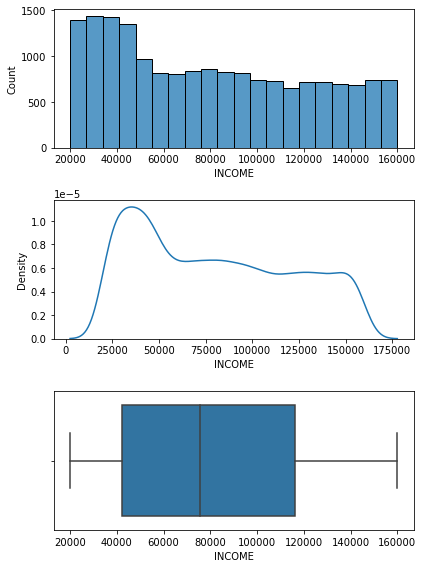

In [65]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data['INCOME'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data['INCOME'])

plt.subplot(3,1,3)
sns.boxplot(data['INCOME'])

plt.tight_layout()
plt.show()

수입은 ( 20000-50000 ) ( 50000-110000 ) ( 110000-160000 ) 구간으로 구분이 된다.
( 20000-50000 )인 사람이 많았고 평균은 80000정도이다.
각 수입별 핸드폰 가격, 집가격, 대학 졸업 여부 분석해볼수있다.


### 2) feature2

In [60]:
data['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


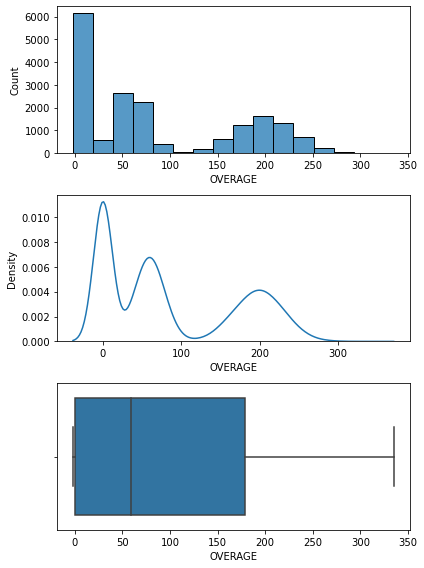

In [62]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data['OVERAGE'], bins = 16)

plt.subplot(3,1,2)
sns.kdeplot(data['OVERAGE'])

plt.subplot(3,1,3)
sns.boxplot(data['OVERAGE'])

plt.tight_layout()
plt.show()

In [ ]:
월 초과시간이 0분에서 25분정도가 가장 많고, 50분에서 75분정도 , 150분에서 250분 전으로 
초과시간이 많다. 


### 3) feature3

In [70]:
data['LEFTOVER'].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


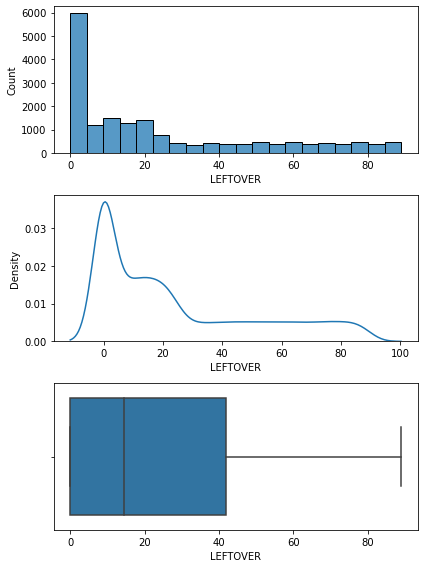

In [69]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data['LEFTOVER'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data['LEFTOVER'])

plt.subplot(3,1,3)
sns.boxplot(data['LEFTOVER'])

plt.tight_layout()
plt.show()

월 잔여 시간은 0분에서 5분정도가 가장 많다.
이후 5분에서 20분/ 20분 이상으로 구간을 나눌수있다.
월 초과하는 사람의 이탈율이 클지 월 잔여 시간이 남는 사람이 이탈율이 클지 고려 필요

### 4) feature4

In [72]:
data['HANDSET_PRICE'].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


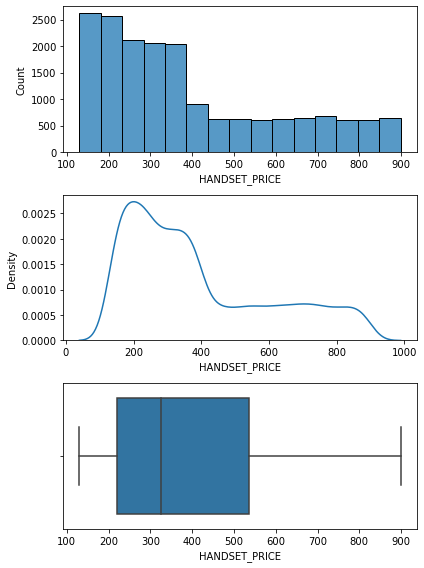

In [77]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data['HANDSET_PRICE'], bins = 15)

plt.subplot(3,1,2)
sns.kdeplot(data['HANDSET_PRICE'])

plt.subplot(3,1,3)
sns.boxplot(data['HANDSET_PRICE'])

plt.tight_layout()
plt.show()

200달러 미만에서 200달러 초반이 가격이 제일 빈도가 높고
200달러 중반에서 400달러 미만이 그 다음
400달러부터 900달러의 빈도가 비슷하다.
세 범주로 나눌 수 있는데 각 핸드폰 기종에 따라 나뉘지 않을까 생각이 든다.
각 핸드폰 구매마다 사용 고객의 나이에서 차이가 있을것같고, 연 수입액에 따라 가격이 다를지 고려해볼만하다.

### 5) feature5

In [84]:
print(data['HOUSE'].isnull().sum())

0


In [85]:
data['HOUSE']=data['HOUSE'].fillna(method='ffill')

In [86]:
data['HOUSE'].describe()

count     18000.000000
mean     495969.950500
std      252164.430553
min      150015.000000
25%      265148.750000
50%      456837.500000
75%      711707.250000
max      999970.000000
Name: HOUSE, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


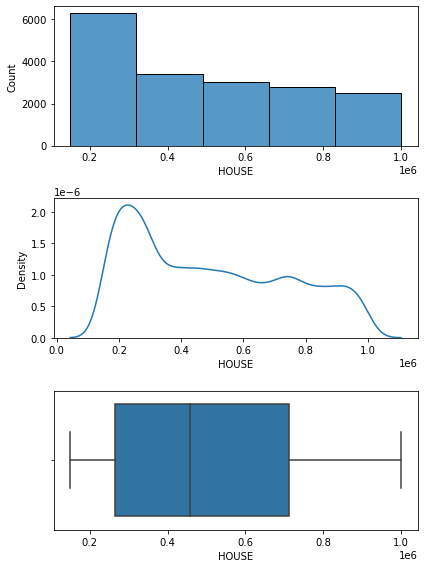

In [90]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data['HOUSE'], bins = 5)

plt.subplot(3,1,2)
sns.kdeplot(data['HOUSE'])

plt.subplot(3,1,3)
sns.boxplot(data['HOUSE'])

plt.tight_layout()
plt.show()

집값이 0.2인 사람이 가장 많고, 그외 나머지 가격은 비율이 동일하나 비싸질수록 빈도가 작아진다. 집값에 따른 연봉과 대학 졸업 여부를 보면 좋을것같다
졸업을 안한 사람은 아직 집이 없거나 저렴할 것이다.

### 6) feature6

In [94]:
print(data['REPORTED_SATISFACTION'].value_counts())
print(data['REPORTED_SATISFACTION'].value_counts()/ len(data['REPORTED_SATISFACTION']))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


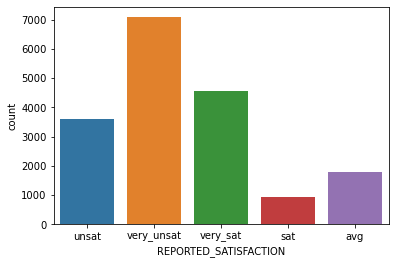

In [95]:
sns.countplot(data['REPORTED_SATISFACTION'])
plt.show()

만족도 조사 결과 매우 불만족이 많다. 이 사람들은 이탈을 거의 다 했을까
그다음은 매우 만족이 많다. 이 사람들은 이탈을 안했을까 분석해볼필요가 있다.

In [92]:
print(data['COLLEGE'].value_counts())
print(data['COLLEGE'].value_counts()/ len(data['COLLEGE']))

1    9049
0    8951
Name: COLLEGE, dtype: int64
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


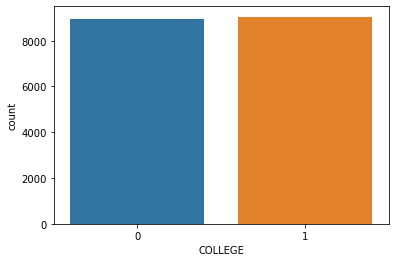

In [93]:
sns.countplot(data['COLLEGE'])
plt.show()

졸업 여부의 비율은 거의 동일하다.

In [96]:
print(data['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print(data['CONSIDERING_CHANGE_OF_PLAN'].value_counts()/ len(data['CONSIDERING_CHANGE_OF_PLAN']))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


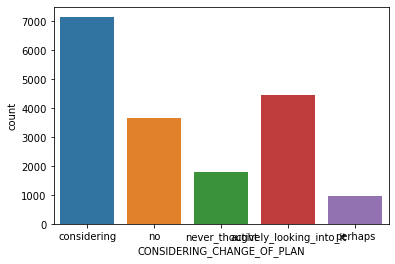

In [97]:
sns.countplot(data['CONSIDERING_CHANGE_OF_PLAN'])
plt.show()

변동을 고려하고 있는 사람이 가장 많고, 살펴보는 사람이 그다음, 옮길 생각 없는 사람이 세번째이다. 
다들 자신의 생각대로 이탈하거나 안했을지 살펴보고, 왜 이탈하고싶어하는지도 여러 변수로 알아볼 필요가 있다

### 7) CHURN(target)

In [98]:
print(data['CHURN'].value_counts())
print(data['CHURN'].value_counts()/ len(data['CHURN']))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


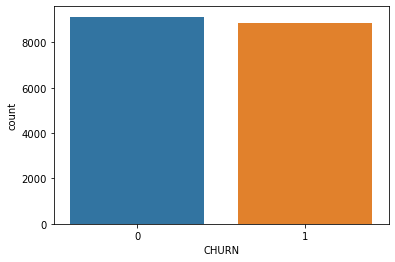

In [99]:
sns.countplot(data['CHURN'])
plt.show()

In [ ]:
이탈 안한 사람이 더 많지만 이탈고객이랑 비슷하다.
즉 이탈한사람이 굉장히 많다.

### 8) 추가1

위에 같이 해놨다

### 9) 추가2

위에 같이 해놨다

### 10) 추가3

위에 같이 해놨다

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) feature --> CHURN

In [5]:
pd.crosstab(data['COLLEGE'], data['CHURN'], normalize='columns')

CHURN,0,1
COLLEGE,,
0,0.505531,0.488781
1,0.494469,0.511219


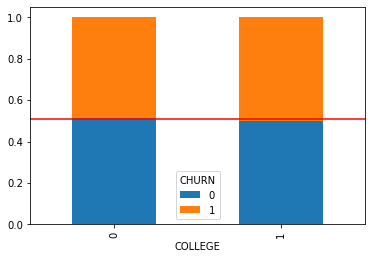

In [7]:
temp = pd.crosstab(data['COLLEGE'], data['CHURN'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['CHURN'].mean(), color = 'r')
plt.show()

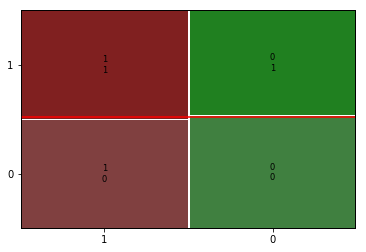

In [10]:
mosaic(data, [ 'COLLEGE', 'CHURN'])
plt.axhline(1- data['CHURN'].mean(), color = 'r')
plt.show()

In [9]:
table = pd.crosstab(data['CHURN'], data['COLLEGE'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 4.982102934693503
p-value 0.025610833478220536


p값을 보면 0.05이하로 유의미하다.

대학졸업여부와 고객 이탈 여부는 큰차이가 없으나 왜 이 변수가 있는지 다시 생각해보자
    -고졸 직장인을 뜻하는 줄 알았으나 그냥 아직 학생신분과 졸업자로 나눈다면 수입이 다를 것이다. 
-대학 졸업 여부와 연 수입액에 차이가 있을 수 있다. 

#### 2) feature --> CHURN

In [12]:
pd.crosstab(data['REPORTED_SATISFACTION'], data['CHURN'], normalize='columns')

CHURN,0,1
REPORTED_SATISFACTION,,
avg,0.104466,0.096508
sat,0.053989,0.049723
unsat,0.196642,0.203187
very_sat,0.256118,0.251780
very_unsat,0.388785,0.398802


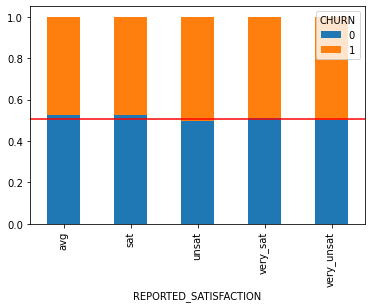

In [13]:
temp = pd.crosstab(data['REPORTED_SATISFACTION'], data['CHURN'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['CHURN'].mean(), color = 'r')
plt.show()

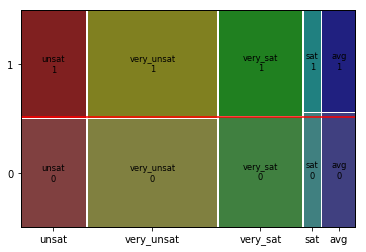

In [14]:
mosaic(data, [ 'REPORTED_SATISFACTION', 'CHURN'])
plt.axhline(1- data['CHURN'].mean(), color = 'r')
plt.show()

In [15]:
table = pd.crosstab(data['CHURN'], data['REPORTED_SATISFACTION'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066


p 값은 0.1로 만족도에 따른 이탈 여부는 유의하지 않다.
-하지만, 이럴거면 만족도 조사는 왜 하는 것인가? 영향을 미치지 않을까? 
    -변경 계획 설문과 비교해보는것이나 , 설문에 제대로 응답하지 않았을수도

#### 3) feature --> CHURN

In [18]:
pd.crosstab(data['CONSIDERING_CHANGE_OF_PLAN'], data['CHURN'], normalize='columns')

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,0.249480,0.245236
considering,0.399518,0.393844
never_thought,0.101413,0.098997
no,0.199650,0.205322
perhaps,0.049940,0.056602


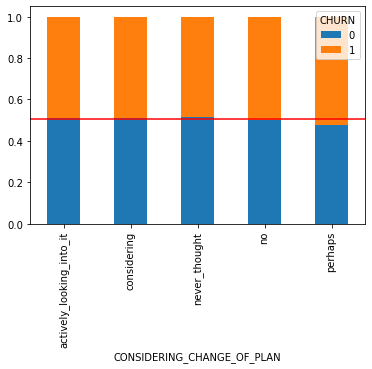

In [19]:
temp = pd.crosstab(data['CONSIDERING_CHANGE_OF_PLAN'], data['CHURN'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['CHURN'].mean(), color = 'r')
plt.show()

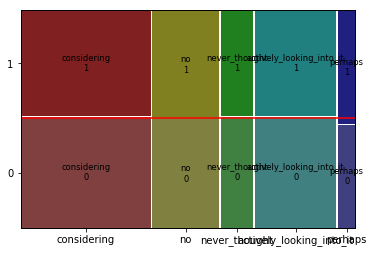

In [20]:
mosaic(data, [ 'CONSIDERING_CHANGE_OF_PLAN', 'CHURN'])
plt.axhline(1- data['CHURN'].mean(), color = 'r')
plt.show()

In [21]:
table = pd.crosstab(data['CHURN'], data['CONSIDERING_CHANGE_OF_PLAN'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 5.421434419620689
p-value 0.2467222586679969


p 값을 보면 변경계획 설문과 유의하지 않다.
-왜 관련이 없을까 ? 거짓말해서?
    -생각이 없었는데 핸드폰을 새로 바꿨거나, 

#### 4) feature --> CHURN

In [ ]:
pd.crosstab(data['COLLEGE'], data['CHURN'], normalize='columns')

In [ ]:
temp = pd.crosstab(data['COLLEGE'], data['CHURN'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['CHURN'].mean(), color = 'r')
plt.show()

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) feature --> CHURN


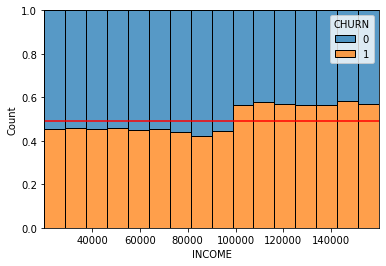

In [24]:
target_mean=data['CHURN'].mean()

sns.histplot(x='INCOME', data = data , hue = 'CHURN', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

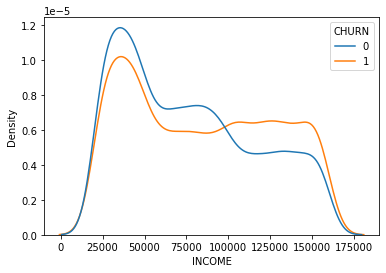

In [25]:
sns.kdeplot(x='INCOME', data = data, hue ='CHURN', common_norm=False)
plt.show()

In [26]:
temp = data.loc[data['INCOME'].notnull()]

model = sm.Logit(temp['CHURN'], temp['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


p값이 0.05이하로 수입과 이탈은 유의미하다.
수입 10000달러 이후로 이탈률이 증가한다.
-고수입자들이 주로 사용하는 사용처의 혜택이랑 맞지 않는 혜택이 있지 않을까?
    -백화점 혜택이 없다와 같은 혜택 부족. 고수입자들은 할인보단 조금 더 나은 서비스를 원할거같다.
-반대로 저수익자가 자주 사용하는 혜택
    -대중교통할인, 대형 마트 할인, 등등의 할인

#### 2) feature --> CHURN


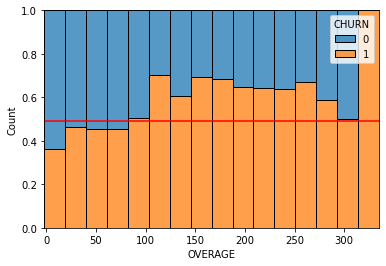

In [27]:
target_mean=data['CHURN'].mean()

sns.histplot(x='OVERAGE', data = data , hue = 'CHURN', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

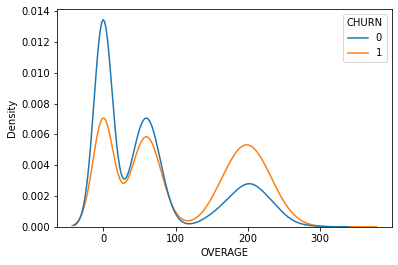

In [28]:
sns.kdeplot(x='OVERAGE', data = data, hue ='CHURN', common_norm=False)
plt.show()

In [29]:
temp = data.loc[data['OVERAGE'].notnull()]

model = sm.Logit(temp['CHURN'], temp['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


초과 사용시간과 이탈률은 유의미하다.
-특히 100분 이상 초과하면 이탈률이 평균을 크게 넘는다.
-이를 보면 너무 많이 넘어서 더 큰 요금제를 찾아서 떠난다는 생각
-또한 300분 초과할땐 이탈률이 잠시 평균대인것을 보아 300분 초과시 데이터 이월제가 가능한게 아닐까 생각이 든다

#### 3) feature --> CHURN


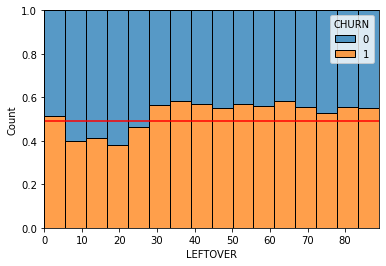

In [31]:
target_mean=data['CHURN'].mean()

sns.histplot(x='LEFTOVER', data = data , hue = 'CHURN', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

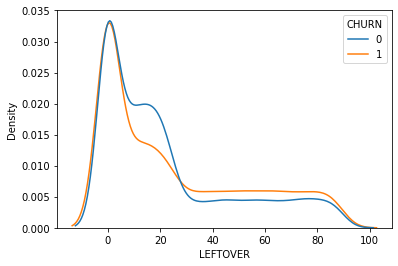

In [32]:
sns.kdeplot(x='LEFTOVER', data = data, hue ='CHURN', common_norm=False)
plt.show()

In [33]:
temp = data.loc[data['LEFTOVER'].notnull()]

model = sm.Logit(temp['CHURN'], temp['LEFTOVER'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


월 사용 잔여시간과 이탈률은 유의미하다
특히 30분 이상 잔여시간이 남을때부터 이탈률이 증가했다.
반대로 잔여시간이 거의남지않는데 이탈률이 평균보다 높은 경우가 있다. 왜일까?
-이를보아 요금제가 맞지 않아 이탈하는것으로 생각할 수 있다.
    -너무 많이 남아서 줄이고싶은데 적당한 요금제가 없거나

#### 4) feature --> CHURN


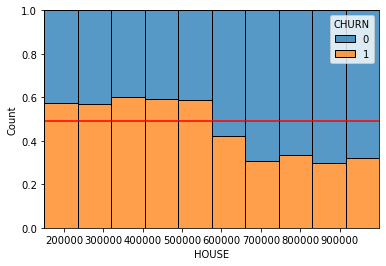

In [42]:
target_mean=data['CHURN'].mean()

sns.histplot(x='HOUSE', data = data , hue = 'CHURN', multiple = 'fill', bins = 10)
plt.axhline(target_mean, color = 'r')
plt.show()

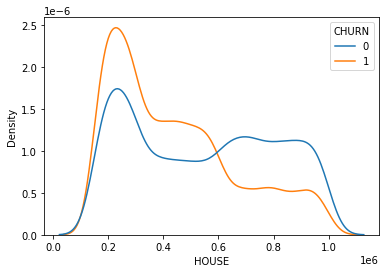

In [35]:
sns.kdeplot(x='HOUSE', data = data, hue ='CHURN', common_norm=False)
plt.show()

In [39]:
temp = data.loc[data['HOUSE'].notnull()]

model = sm.Logit(temp['CHURN'], temp['HOUSE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687266
         Iterations 2
HOUSE    6.401120e-47
dtype: float64


집값과 이탈률은 유의미하다.
-그래프를 보면 극명하게 600000이후로 이탈률이 평균이하로 감소한다.
-집값이 높을수록 집이 넓다고 가정하면, 구성원이 많다고 판단할 수 있다. 
    -만약 그 구성원은 가족 할인, 인터넷 등이 한 통신사로 묶여있을 가능성이 높다.
        -그래서 이탈률이 낮다.
-혹은, 집값이 높을수록 집이 부유하다는 가정하에 그냥 신경을 안쓰는 것일수도 있다.
-집값과 수익을 같이 비교해보면 무언가 얻을 수 있을거같다.

핸드폰 가격->이탈률

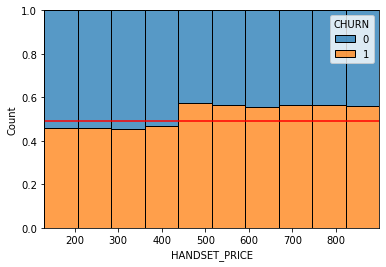

In [43]:
target_mean=data['CHURN'].mean()

sns.histplot(x='HANDSET_PRICE', data = data , hue = 'CHURN', multiple = 'fill', bins = 10)
plt.axhline(target_mean, color = 'r')
plt.show()

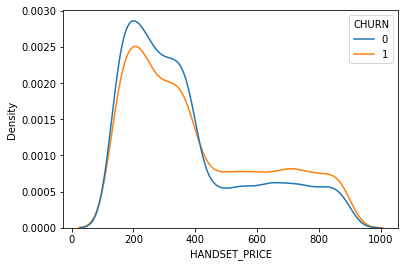

In [44]:
sns.kdeplot(x='HANDSET_PRICE', data = data, hue ='CHURN', common_norm=False)
plt.show()

In [45]:
temp = data.loc[data['HANDSET_PRICE'].notnull()]

model = sm.Logit(temp['CHURN'], temp['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


핸드폰가격과 이탈률은 유의미하다. 하지만 약한 관계다.
그래프를 보면 핸드폰 가격이 450달러부터 이탈률이 증가한다.
-핸드폰의 가격이 높을수록 최신폰이거나 유행에 민감할 수 있다고 가정한다.
    -핸드폰을 바꾸는 경우 할인을 위해 통신사를 바꿀 수 있다. 


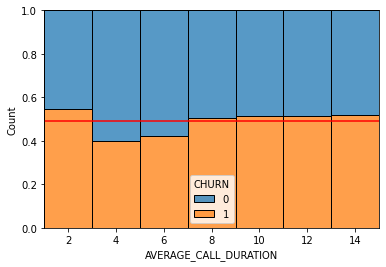

In [48]:
target_mean=data['CHURN'].mean()

sns.histplot(x='AVERAGE_CALL_DURATION', data = data , hue = 'CHURN', multiple = 'fill', bins = 7)
plt.axhline(target_mean, color = 'r')
plt.show()

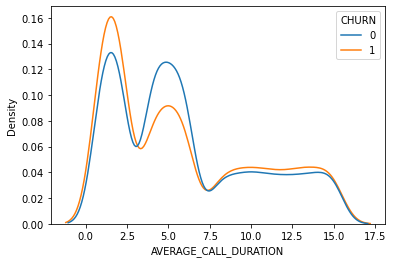

In [49]:
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = data, hue ='CHURN', common_norm=False)
plt.show()

In [50]:
temp = data.loc[data['AVERAGE_CALL_DURATION'].notnull()]

model = sm.Logit(temp['CHURN'], temp['AVERAGE_CALL_DURATION'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


평균통화시간과 이탈률은 유의미하다. 하지만 약한 관계다.
평균 4분에서 6분 통화하는 사람은 이탈을 안했지만 그외 시간대는 
평균이거나 평균이상의 이탈률을 가진다.
-통화를 거의 안해서 다른 것으로 바꾸고 싶거나, 통화를 자주해서 지금 통신사에 불만족할 확률이 높다.

## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
OVERAGE, HOUSE

### 2) 약한관계의 변수

In [ ]:
COLLEGE, INCOME,  LEFTOVER, HANDSET_PRICE

### 3) 관계 없음

In [ ]:
REPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN -> 단면적으로 볼땐 둘다 유의하지않으나
같이 비교해보면 영향이 있다고 생각한다.

## 5.추가 분석

In [100]:
tmp=data.groupby(['COLLEGE'], as_index = False)[['INCOME']].mean()
tmp

,COLLEGE,INCOME
0,0,79906.901352
1,1,80717.486021


대학졸업자의 수입이 졸업하지 않은 사람의 수입보다 조금 더 높다. 하지만 별 차이 안난다.

In [107]:
#옮길지 고려하는 사람/아닌 사람  과  만족하는 사람/안하는 사람 나눠서 잔여별/초과사용량 보기
data['Consider'] = np.where( data['CONSIDERING_CHANGE_OF_PLAN'].isin(['never_thought','no']), 'no'  , 'yes' )
data['Satisfy'] = np.where( data['REPORTED_SATISFACTION'].isin(['very_unsat','unsat']), 'unsat'  , 'sat' )
data.head()


tmp=data.groupby(['Consider','Satisfy'], as_index = False)[['OVERAGE','LEFTOVER']].mean()
tmp



,Consider,Satisfy,OVERAGE,LEFTOVER
0,no,sat,83.132151,23.710421
1,no,unsat,86.246477,23.233323
2,yes,sat,84.866417,24.402715
3,yes,unsat,87.567680,24.130272


미세하지만 현재 불만족하는 사람은 만족하는 사람보다 사용시간 초과시간이 높았다.
-사용시간 부족이 시간 남는것보다 만족도를 떨어뜨린다.
옮길지 고려하는 사람이 안옮기려는 사람보다 사용 잔여 시간이 더 많았다.
-현재 요금제만큼 필요없기때문에 이탈해서 요금을 줄이려는게 아닐까?


In [113]:
tmp=data.groupby(['Consider','Satisfy','CHURN'], as_index = False)['HOUSE'].count()
tmp

,Consider,Satisfy,CHURN,HOUSE
0,no,sat,0,1162
1,no,sat,1,1093
2,no,unsat,0,1587
3,no,unsat,1,1606
4,yes,sat,0,2634
5,yes,sat,1,2449
6,yes,unsat,0,3748
7,yes,unsat,1,3721


옮길지 고려/만족/ 이탈한 사람의 경우의 수에 따른 갯수를 측정해보고자 그룹화했다.
1. 옮길지 고려한 사람이 안갈거라는 사람보다 이탈한 사람이 훨씬 많다.
2. 불만족하는 사람이 만족보다 이탈하는 사람이 많다.
3. 옮길지 고려하고, 만족하는 사람보다 옮길지 고려 안하고, 불만족하는 사람의 이탈수가 낮다. 즉 옮길지 고려하는게 만족도보다 이탈률에 더 많은 영향을 미친다.

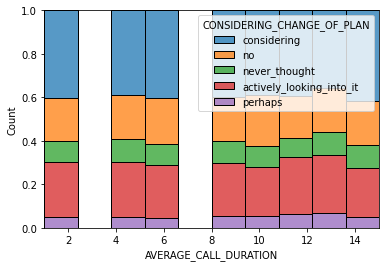

In [124]:
sns.histplot(x='AVERAGE_CALL_DURATION', data = data, hue = 'CONSIDERING_CHANGE_OF_PLAN', multiple = 'fill', bins = 10)
plt.show()

평균 사용시간에 따라 옮길지 고려하는 차이가 있을것이라 예상했지만, 별 차이 없었다.
하지만 평균사용시간이 10~14분일때 고려중이거나 아마도 옮길것이다 답한 사람의 비율이 좀 더 큰것을 관찰했다.

후기: 분명 오전에 이탈률 분석할때만 해도 그래프에 특징이나 이 부분이 이상하다 하는 점이 잘 보였는데 오후에 데이터 분석하니 큰 관계를 찾는것이 어려웠다. 데이터를 여러 관점으로 쪼개보는 연습을 더 많이 해야할거같다.